In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [2]:
data = pd.read_csv('C:/Users/mod96/Desktop/HSH/StudyingMaterials/Project - datascience/dataset/005930.KS_5y.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-30,29700.0,30000.0,29680.0,30000.0,41.274914,10588400
1,2013-10-31,29960.0,30040.0,29300.0,29300.0,40.311840,12647050
2,2013-11-01,29800.0,30000.0,29360.0,30000.0,41.274914,11357700
3,2013-11-04,29840.0,30040.0,29780.0,29980.0,41.247398,10887800
4,2013-11-05,30040.0,30040.0,29440.0,29700.0,40.862167,8009300


In [3]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [4]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [5]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1057, 50, 1), (117, 50, 1))

In [9]:
normalized_data

[[0.0,
  -0.005697050938337833,
  -0.00536193029490617,
  0.0023458445040214215,
  -0.0033512064343163006,
  -0.012399463806970545,
  -0.03518766756032177,
  -0.04993297587131362,
  -0.04725201072386054,
  -0.027479892761394065,
  -0.03887399463806973,
  -0.03518766756032177,
  -0.03016085790884715,
  -0.014410187667560304,
  -0.0060321715817693855,
  -0.011058981233244003,
  -0.02680965147453085,
  -0.03250670241286868,
  -0.0204423592493298,
  -0.016756032171581725,
  -0.01608579088471851,
  -0.003686327077747964,
  0.0,
  -0.004691689008042843,
  -0.016420911528150173,
  -0.03351206434316356,
  -0.03887399463806973,
  -0.03418230563002678,
  -0.03016085790884715,
  -0.03418230563002678,
  -0.041554959785522816,
  -0.05965147453083108,
  -0.06132707774798929,
  -0.06601876675603213,
  -0.05831099195710454,
  -0.06032171581769441,
  -0.0442359249329759,
  -0.04825737265415553,
  -0.039209115281501394,
  -0.045911528150133996,
  -0.05630026809651478,
  -0.05965147453083108,
  -0.076072

In [6]:
model = Sequential()

model.add(layers.LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(layers.LSTM(64, return_sequences=False))

model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Train on 1057 samples, validate on 117 samples
Epoch 1/20
1057/1057 [==============================] - 13s 12ms/sample - loss: 0.0015 - val_loss: 7.1944e-04
Epoch 2/20
1057/1057 [==============================] - 8s 8ms/sample - loss: 7.0929e-04 - val_loss: 3.7178e-04
Epoch 3/20
1057/1057 [==============================] - 8s 8ms/sample - loss: 5.6466e-04 - val_loss: 4.0503e-04
Epoch 4/20
1057/1057 [==============================] - 8s 8ms/sample - loss: 4.3043e-04 - val_loss: 2.5920e-04
Epoch 5/20
1057/1057 [==============================] - 8s 8ms/sample - loss: 3.5439e-04 - val_loss: 2.4931e-04
Epoch 6/20
1057/1057 [==============================] - 8s 8ms/sample - loss: 2.8933e-04 - val_loss: 3.2158e-04
Epoch 7/20
1057/1057 [==============================] - 8s 8ms/sample - loss: 2.6388e-04 - val_loss: 1.9459e-04
Epoch 8/20
1057/1057 [==============================] - 8s 8ms/sample - loss: 2.4295e-04 - val_loss: 1.7277e-04
Epoch 9/20
1057/1057 [==============================] - 8s 

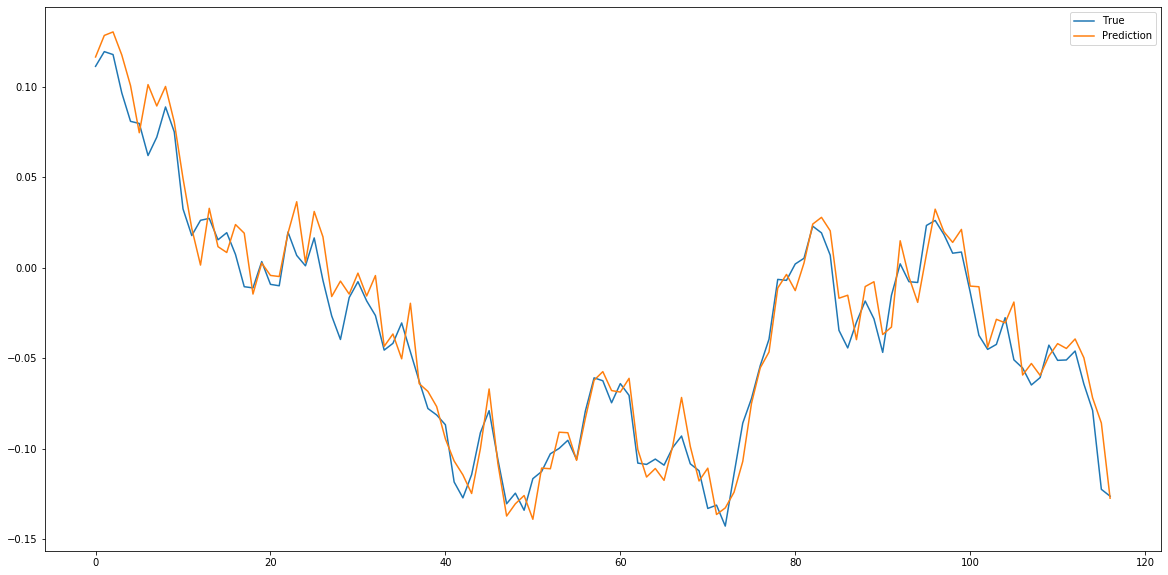

In [8]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [19]:
x_test

array([[[ 0.        ],
        [-0.010065  ],
        [-0.01425875],
        ...,
        [ 0.11218285],
        [ 0.1113441 ],
        [ 0.1113441 ]],

       [[ 0.        ],
        [-0.00423639],
        [ 0.00148274],
        ...,
        [ 0.12264351],
        [ 0.12264351],
        [ 0.12264351]],

       [[ 0.        ],
        [ 0.00574346],
        [ 0.00659434],
        ...,
        [ 0.1274197 ],
        [ 0.1274197 ],
        [ 0.12422889]],

       ...,

       [[ 0.        ],
        [ 0.00971398],
        [ 0.00917431],
        ...,
        [-0.05450621],
        [-0.05936319],
        [-0.0717755 ]],

       [[ 0.        ],
        [-0.00053447],
        [-0.02458578],
        ...,
        [-0.06841261],
        [-0.08070551],
        [-0.08765366]],

       [[ 0.        ],
        [-0.02406417],
        [-0.04010695],
        ...,
        [-0.0802139 ],
        [-0.08716578],
        [-0.12192513]]])

In [56]:
ypredicted=model.predict(x_test)
ypredicted.shape

(117, 1)

In [57]:
for i in range(len(x_test)):
    ypredicted[i,0]=x_test2[i,0,0]*(1+ypredicted[i])

In [58]:
ypredicted

array([[53246.37 ],
       [53272.332],
       [53138.37 ],
       [52840.555],
       [52082.242],
       [51453.88 ],
       [52364.094],
       [50549.62 ],
       [50192.16 ],
       [50202.562],
       [50434.51 ],
       [49842.9  ],
       [49965.965],
       [51829.633],
       [51606.387],
       [51936.13 ],
       [52751.938],
       [51803.105],
       [50152.223],
       [50783.13 ],
       [51203.77 ],
       [51162.816],
       [51119.94 ],
       [51473.46 ],
       [49917.668],
       [50237.082],
       [49777.254],
       [48705.023],
       [48501.324],
       [47017.496],
       [47450.383],
       [47607.6  ],
       [47784.71 ],
       [46701.06 ],
       [46851.58 ],
       [46773.746],
       [48196.777],
       [46604.07 ],
       [46799.75 ],
       [46332.44 ],
       [46151.312],
       [46681.81 ],
       [45908.61 ],
       [45112.7  ],
       [45875.133],
       [46522.11 ],
       [45736.816],
       [45764.992],
       [46089.332],
       [46330.78 ],


In [51]:
seq_len = 50
sequence_length = seq_len + 1

result2 = []
for index in range(len(mid_prices) - sequence_length):
    result2.append(mid_prices[index: index + sequence_length])

result2=np.array(result2)
# split train and test data
row = int(round(result2.shape[0] * 0.9))

x_test2 = result2[row:, :-1]
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1))
y_test2 = result2[row:, -1]

x_test2.shape

(117, 50, 1)

In [61]:
x_test2[116,49,0]

41050.0

In [62]:
rgraph=[]
for i in range(x_test2.shape[0]):
    rgraph.append(x_test2[i,-1,0])
rgraph

[53000.0,
 53000.0,
 52850.0,
 52550.0,
 51850.0,
 51150.0,
 51700.0,
 50500.0,
 49750.0,
 49675.0,
 49950.0,
 49625.0,
 49650.0,
 51200.0,
 51550.0,
 51800.0,
 52500.0,
 51900.0,
 50300.0,
 50325.0,
 50825.0,
 50950.0,
 50900.0,
 51150.0,
 50000.0,
 49825.0,
 49525.0,
 48600.0,
 48175.0,
 46925.0,
 46925.0,
 47225.0,
 47475.0,
 46725.0,
 46600.0,
 46600.0,
 47750.0,
 46875.0,
 46675.0,
 46325.0,
 46100.0,
 46550.0,
 46075.0,
 45250.0,
 45650.0,
 46325.0,
 45925.0,
 45850.0,
 46125.0,
 46400.0,
 45900.0,
 46825.0,
 46900.0,
 47150.0,
 46675.0,
 46275.0,
 46225.0,
 46500.0,
 46725.0,
 46575.0,
 46225.0,
 46450.0,
 46150.0,
 45675.0,
 45950.0,
 46325.0,
 46775.0,
 46750.0,
 45625.0,
 44875.0,
 45125.0,
 44175.0,
 44225.0,
 43850.0,
 44300.0,
 45550.0,
 45950.0,
 45975.0,
 46275.0,
 46625.0,
 46600.0,
 47325.0,
 47725.0,
 47800.0,
 47500.0,
 46925.0,
 46100.0,
 44800.0,
 45275.0,
 45475.0,
 44800.0,
 44375.0,
 45375.0,
 45350.0,
 45300.0,
 45950.0,
 47000.0,
 47050.0,
 46975.0,
 46775.0,


In [59]:
result2

array([[29840., 29670., 29680., ..., 25820., 25580., 25700.],
       [29670., 29680., 29910., ..., 25580., 25700., 26200.],
       [29680., 29910., 29740., ..., 25700., 26200., 26290.],
       ...,
       [46325., 46775., 46750., ..., 43575., 43000., 42675.],
       [46775., 46750., 45625., ..., 43000., 42675., 41050.],
       [46750., 45625., 44875., ..., 42675., 41050., 40850.]])

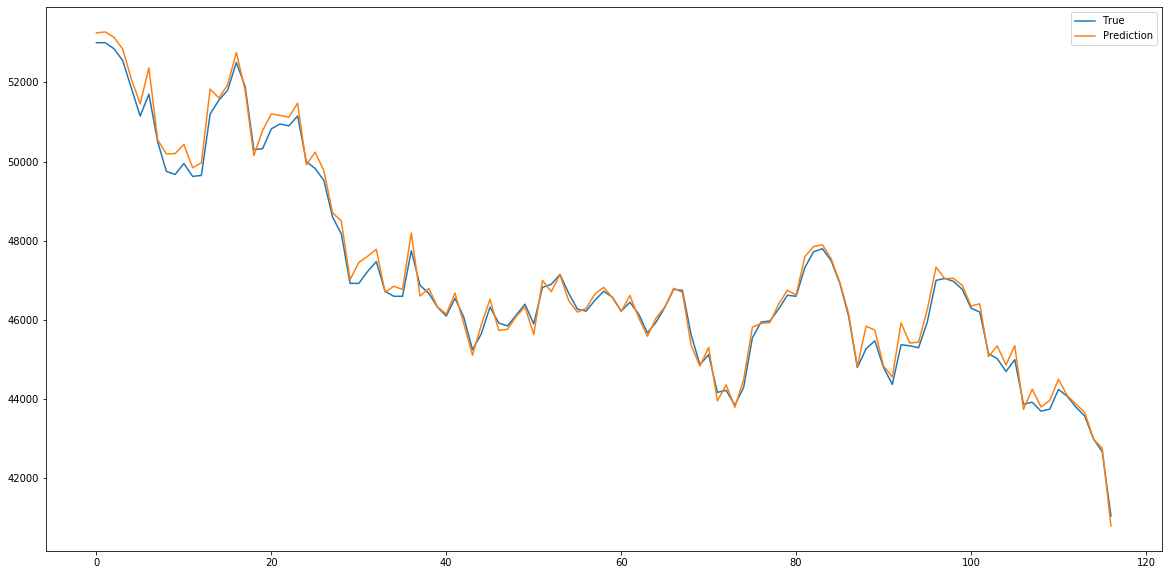

In [63]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(rgraph, label='True')
ax.plot(ypredicted, label='Prediction')
ax.legend()
plt.show()

In [69]:
ypredicted=list(ypredicted.reshape(117))

In [79]:
accurac=[]
for i in range(len(ypredicted)):
    accurac.append(abs(rgraph[i]-ypredicted[i]))
accurac

[246.37109375,
 272.33203125,
 288.37109375,
 290.5546875,
 232.2421875,
 303.87890625,
 664.09375,
 49.62109375,
 442.16015625,
 527.5625,
 484.51171875,
 217.8984375,
 315.96484375,
 629.6328125,
 56.38671875,
 136.12890625,
 251.9375,
 96.89453125,
 147.77734375,
 458.12890625,
 378.76953125,
 212.81640625,
 219.94140625,
 323.4609375,
 82.33203125,
 412.08203125,
 252.25390625,
 105.0234375,
 326.32421875,
 92.49609375,
 525.3828125,
 382.6015625,
 309.7109375,
 23.94140625,
 251.578125,
 173.74609375,
 446.77734375,
 270.9296875,
 124.75,
 7.44140625,
 51.3125,
 131.80859375,
 166.390625,
 137.30078125,
 225.1328125,
 197.109375,
 188.18359375,
 85.0078125,
 35.66796875,
 69.21875,
 264.484375,
 176.1171875,
 184.83984375,
 9.7421875,
 186.57421875,
 75.203125,
 72.9609375,
 159.24609375,
 100.45703125,
 13.2421875,
 7.3125,
 167.9609375,
 92.30859375,
 84.66015625,
 105.421875,
 9.18359375,
 25.56640625,
 53.89453125,
 266.68359375,
 36.1015625,
 184.25,
 213.0390625,
 138.480468

In [80]:
np.array(accurac)

array([246.37109375, 272.33203125, 288.37109375, 290.5546875 ,
       232.2421875 , 303.87890625, 664.09375   ,  49.62109375,
       442.16015625, 527.5625    , 484.51171875, 217.8984375 ,
       315.96484375, 629.6328125 ,  56.38671875, 136.12890625,
       251.9375    ,  96.89453125, 147.77734375, 458.12890625,
       378.76953125, 212.81640625, 219.94140625, 323.4609375 ,
        82.33203125, 412.08203125, 252.25390625, 105.0234375 ,
       326.32421875,  92.49609375, 525.3828125 , 382.6015625 ,
       309.7109375 ,  23.94140625, 251.578125  , 173.74609375,
       446.77734375, 270.9296875 , 124.75      ,   7.44140625,
        51.3125    , 131.80859375, 166.390625  , 137.30078125,
       225.1328125 , 197.109375  , 188.18359375,  85.0078125 ,
        35.66796875,  69.21875   , 264.484375  , 176.1171875 ,
       184.83984375,   9.7421875 , 186.57421875,  75.203125  ,
        72.9609375 , 159.24609375, 100.45703125,  13.2421875 ,
         7.3125    , 167.9609375 ,  92.30859375,  84.66